<a href="https://colab.research.google.com/github/swarnava-96/Exploratory-Data-Analysis-EDA/blob/main/EDA_on_Healthcare_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Healthcare Data** 

In [3]:
# Importing the dependencies
import numpy as np
import pandas as pd
import datetime
from time import strftime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the dataset
base_data = pd.read_csv('Data.csv')
base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Lets see the shape of the data
print(base_data.shape)

# Lets see the dataset description
base_data.describe()

(110527, 14)


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Lets see the dataset info
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Modifying the date and time into standard form
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [8]:
# Lets see the dataset
base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Storing the weekdays into a variable for ScheduledDay & AppointmentDay:

In [9]:
# For the ScheduledDay
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [10]:
# For the AppointmentDay
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [11]:
# Lets see the days distribution of the sch_weekday
base_data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

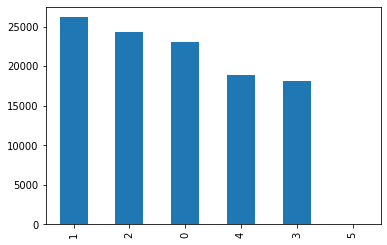

In [12]:
# Visualizing the above result
base_data['sch_weekday'].value_counts().plot(kind='bar');

In [13]:
# Lets see the days distribution of the app_weekday
base_data['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

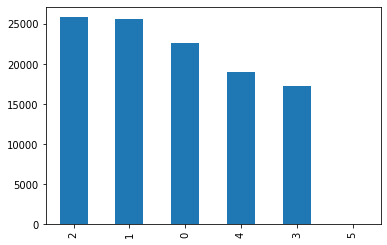

In [14]:
# Visualizing the above result
base_data['app_weekday'].value_counts().plot(kind='bar');

In [15]:
# Lets see the column names
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [16]:
# Changing the name of some columns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [17]:
# Lets see the dataset info once more
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [18]:
# Dropping the columns which have no significance
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [19]:
# Lets see the dataset
base_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


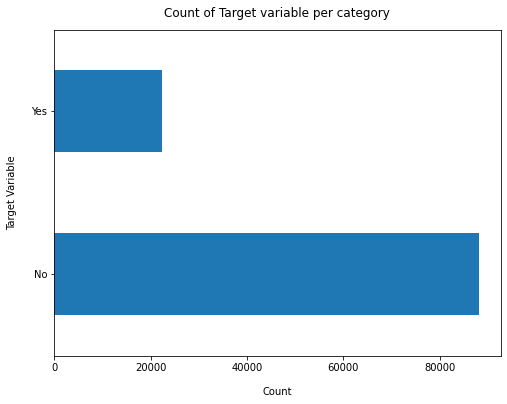

In [20]:
# Counting the target variable per category
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Target Variable', labelpad=14)
plt.title('Count of Target variable per category', y=1.02);

In [21]:
# Calculating the % of appointments or not
base_data['NoShow'].value_counts()/len(base_data['NoShow'])*100

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [22]:
# Lets see the total number of appointments or not
base_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


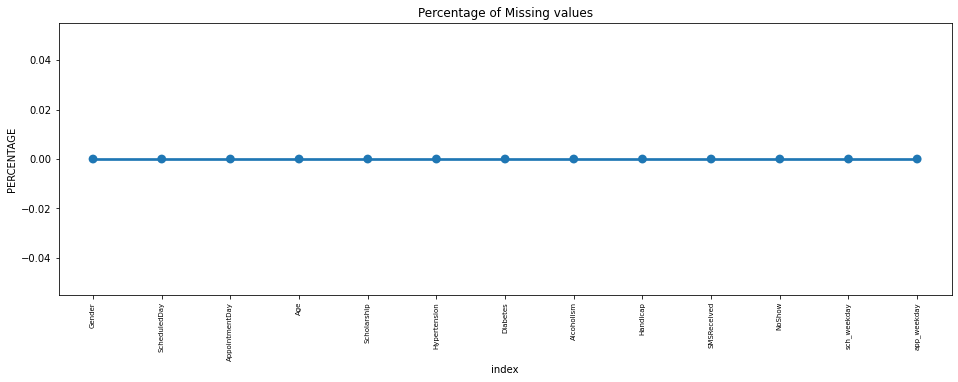

In [23]:
# Visualization of Missing Values
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show();

There is no missing data in our dataset.
### Data Cleaning

In [24]:
# Creating a copy of the base_data for manipulation and processing
new_data = base_data.copy()
new_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


As we do not have any ull record, no data cleaning is required.

In [25]:
# Getting the max tenure
base_data['Age'].max()

115

In [26]:
# Group the tenure in bins of 12 months
labels = ['{0} - {1}'.format(i, i+20) for i in range(1,118,20)]
base_data['Age_Group'] = pd.cut(base_data.Age, range(1,130,20), right=False, labels=labels)

In [27]:
# Lets drop the Age column as it is no longer required
base_data.drop(['Age'], axis = 1, inplace = True)

### Data Exploration

In [28]:
# Lets see the list of features
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_Group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-09       1
2015-11-10       1
2016-01-19       1
2016-06-04       1
2016-03-19       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

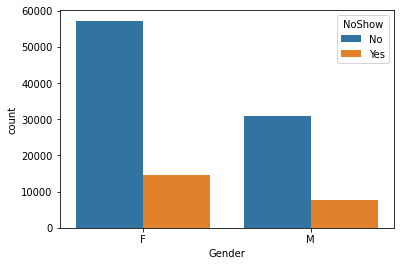

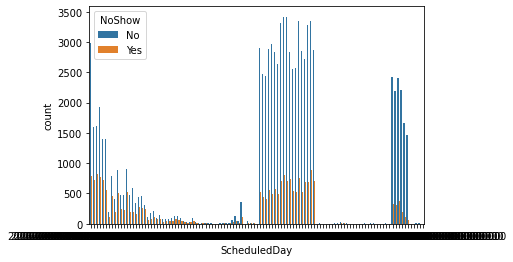

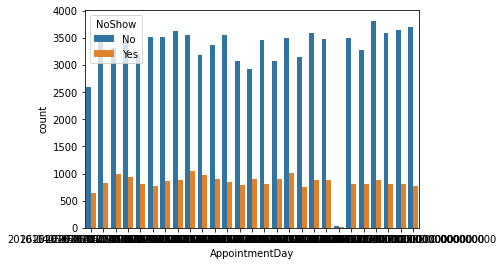

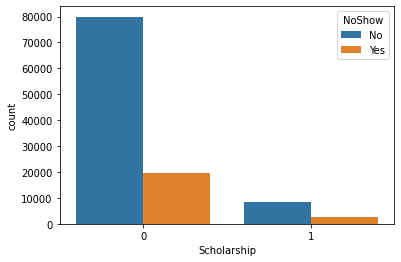

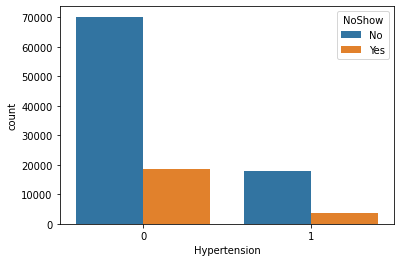

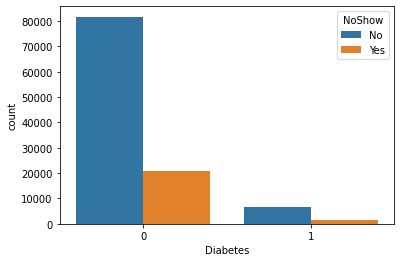

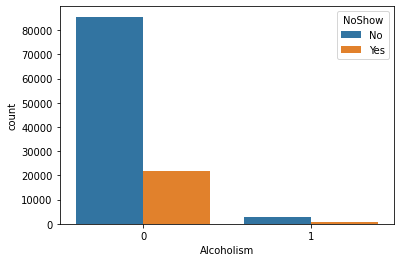

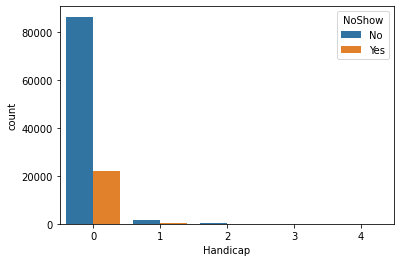

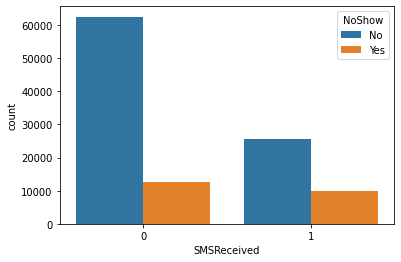

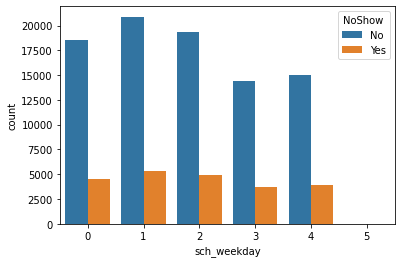

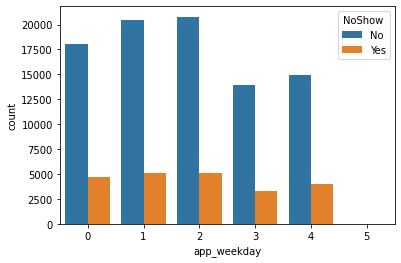

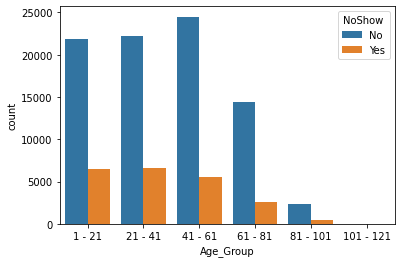

In [31]:
# Value counts of each and every column
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
  print('-'*10, predictor,'-'*10)
  print(base_data[predictor].value_counts())
  plt.figure(i)
  sns.countplot(data=base_data, x=predictor, hue='NoShow')

In [32]:
# Replacing the categories of the dependent feature with 1 and 0
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [33]:
# Lets see the value count of the dependent feture
base_data['NoShow'].value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [34]:
# Converting the categorical variables into dummy variables
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_Group_1 - 21,Age_Group_21 - 41,Age_Group_41 - 61,Age_Group_61 - 81,Age_Group_81 - 101,Age_Group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


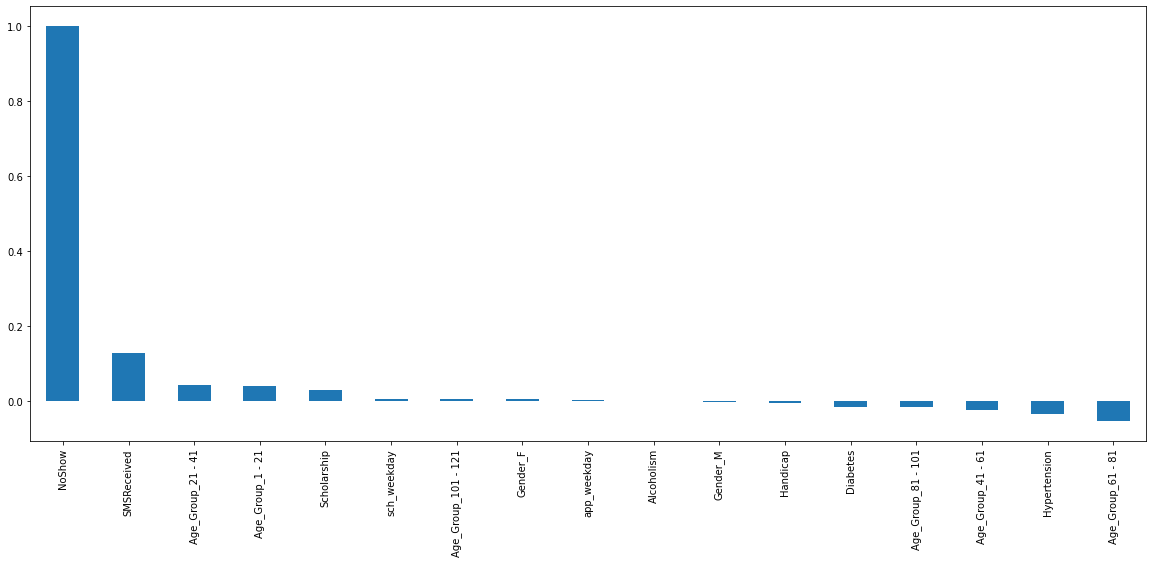

In [36]:
# Lets visualize the correlation between the dependent and the independent variables
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending=False).plot(kind='bar');

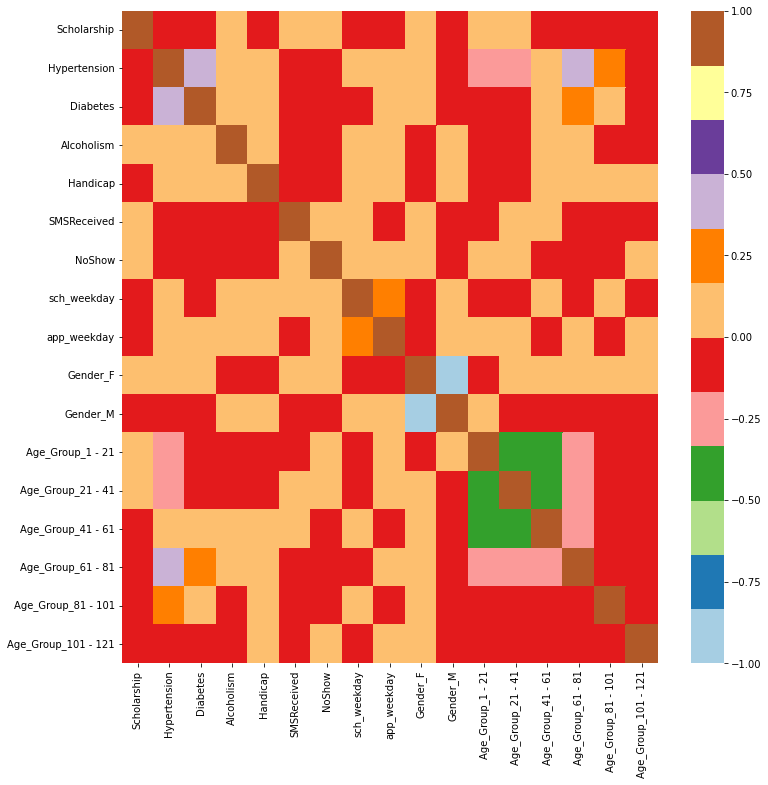

In [37]:
# Correlation Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap='Paired');

### Bivariate Analysis

In [38]:
# Seperating the classes of the dependent variable
new_df1_target0 = base_data.loc[base_data['NoShow'] == 0]
new_df1_target1 = base_data.loc[base_data['NoShow'] == 1]

In [39]:
new_df1_target0

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_Group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,41 - 61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,0,0,0,0,0,1,0,1,1,41 - 61
110523,F,2016-05-03,2016-06-07,0,0,0,0,0,1,0,1,1,41 - 61
110524,F,2016-04-27,2016-06-07,0,0,0,0,0,1,0,2,1,21 - 41
110525,F,2016-04-27,2016-06-07,0,0,0,0,0,1,0,2,1,21 - 41


In [40]:
new_df1_target1

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_Group
6,F,2016-04-27,2016-04-29,0,0,0,0,0,0,1,2,4,21 - 41
7,F,2016-04-27,2016-04-29,0,0,0,0,0,0,1,2,4,21 - 41
11,M,2016-04-26,2016-04-29,0,0,0,0,0,1,1,1,4,21 - 41
17,F,2016-04-28,2016-04-29,1,0,0,0,0,0,1,3,4,21 - 41
20,F,2016-04-27,2016-04-29,0,0,0,0,0,0,1,2,4,21 - 41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03,2016-06-07,0,0,0,0,0,0,1,4,1,41 - 61
110492,M,2016-06-08,2016-06-08,0,1,0,0,0,0,1,2,2,21 - 41
110496,F,2016-06-06,2016-06-08,0,1,0,0,0,0,1,0,2,21 - 41
110515,M,2016-06-06,2016-06-08,0,1,0,0,0,0,1,0,2,21 - 41


In [41]:
def uniplot(df,col,title,hue=None):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams["axes.labelsize"] = 20
  plt.rcParams['axes.titlesize'] = 22
  plt.rcParams['axes.titlepad'] = 30

  temp = pd.Series(data = hue)
  fig, ax = plt.subplots()
  width = len(df[col].unique()) + 7 + 4*len(temp.unique())
  fig.set_size_inches(width , 8)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
      
  plt.show();

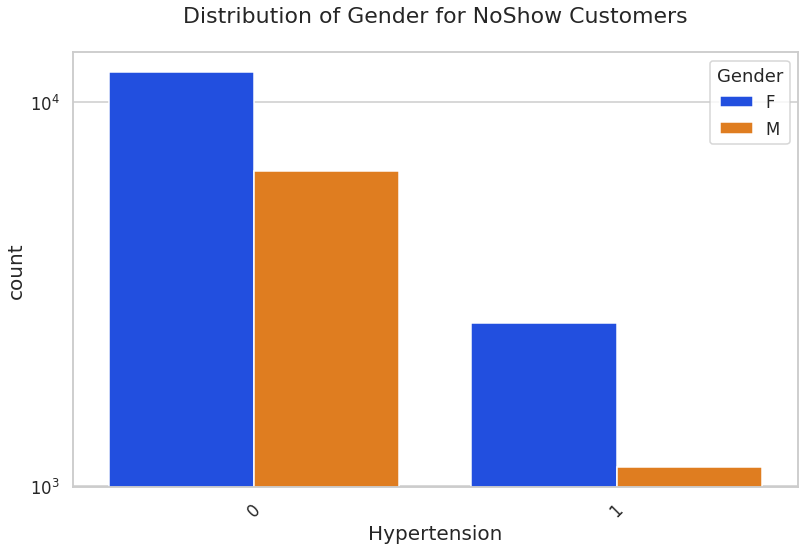

In [42]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

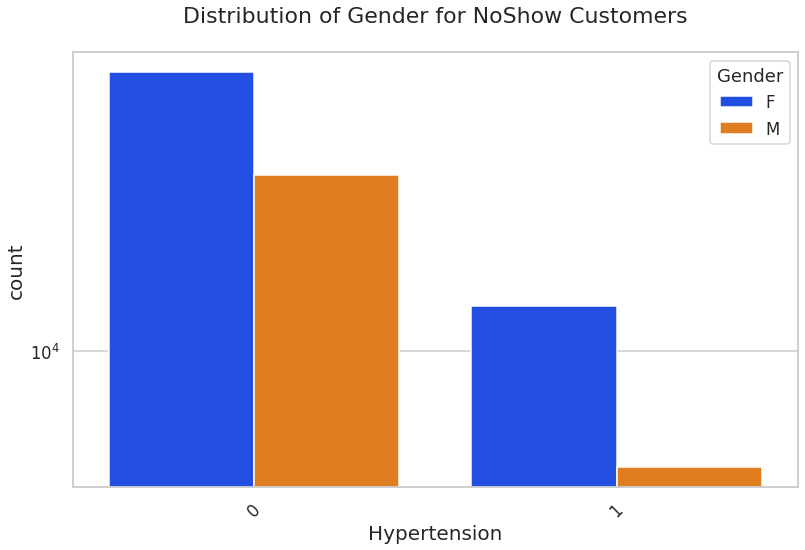

In [43]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

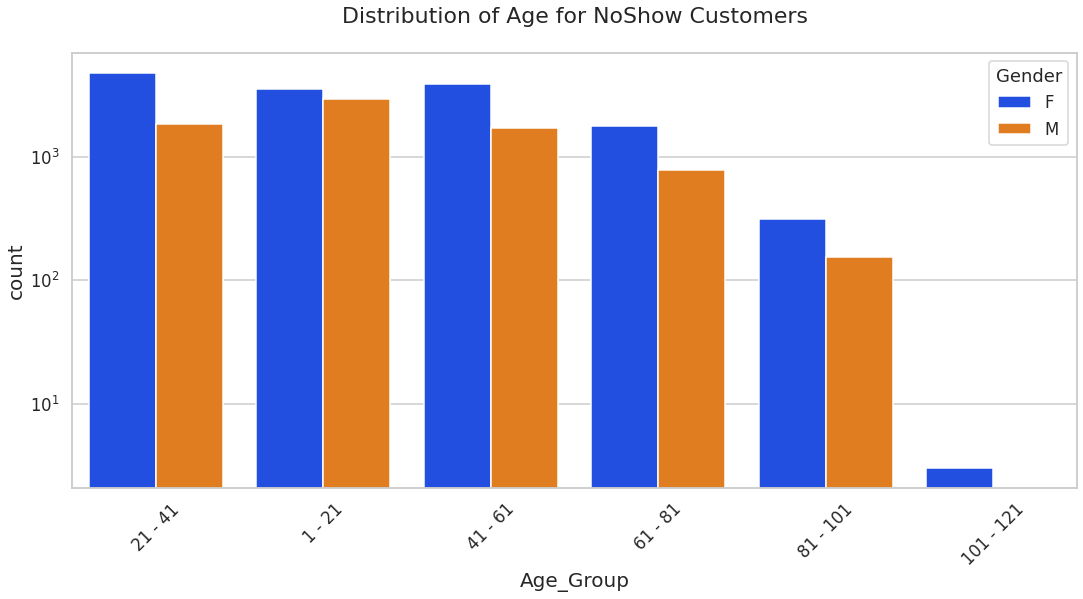

In [46]:
uniplot(new_df1_target1,col='Age_Group',title='Distribution of Age for NoShow Customers',hue='Gender')

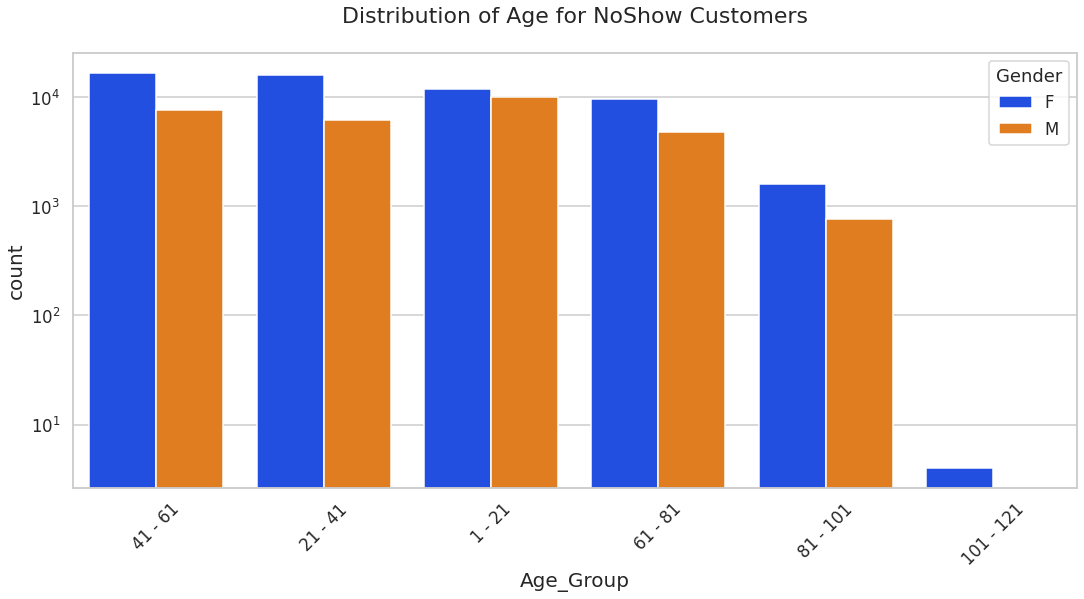

In [47]:
uniplot(new_df1_target0,col='Age_Group',title='Distribution of Age for NoShow Customers',hue='Gender')

### Findings
1. Female patients have taken more appointments then male patients.
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group.
3. Each Neighbourhood have almost 80% show rate.
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
8. There is no appointments on sunday and on saturday appointments are very less in comparision to other week days
 